# Data 101 — Module 5, Session 3
## Wrangling & Summarizing Data (Demo Notebook)

This notebook mirrors the Session 3 slides:
- Import raw data
- Inspect and detect issues
- Handle missing values
- Fix data types
- Remove duplicates and inconsistencies
- Detect potential outliers
- Create derived columns
- Aggregate, group, and pivot
- Export cleaned data

## Import and Read Raw Data

In [1]:
import pandas as pd, numpy as np
df = pd.read_csv("./data/students_messy.csv")
print("Shape:", df.shape)

Shape: (42, 6)


In [2]:
display(df.head())

,Name,Gender,Major,GPA,Hours_Studied,ExamDate
0,Alex,F,Mathematics,3.30,NaN,09/15/2025
1,Sam,M,Mathematics,2.66,13.0,NaN
2,Casey,F,MATH,3.15,13.0,09/15/2025
3,Sam,F,cs,NaN,8.0,2025-09-08
4,Casey,M,Math,3.80,7.0,2025-09-06


In [3]:
print("\nInfo:")
display(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           42 non-null     object 
 1   Gender         42 non-null     object 
 2   Major          42 non-null     object 
 3   GPA            28 non-null     float64
 4   Hours_Studied  29 non-null     float64
 5   ExamDate       38 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.1+ KB


None

## Inspect Missingness and Basic Profiling

In [6]:
df.isnull().head()

,Name,Gender,Major,GPA,Hours_Studied,ExamDate
0,False,False,False,False,True,False
1,False,False,False,False,False,True
2,False,False,False,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,False,False


In [4]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Name              0
Gender            0
Major             0
GPA              14
Hours_Studied    13
ExamDate          4
dtype: int64


<Axes: >

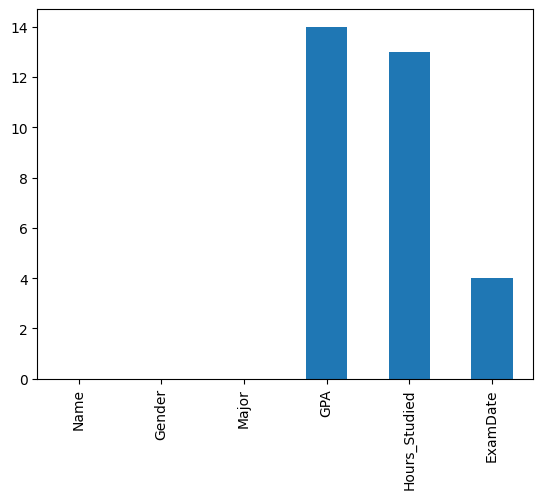

In [8]:
df.isnull().sum().plot.bar()

In [9]:
print("\nDescribe numeric columns:")
display(df.describe())


Describe numeric columns:


,GPA,Hours_Studied
count,28.000000,29.000000
mean,3.056071,7.827586
std,0.386450,3.263094
min,2.490000,1.000000
25%,2.815000,6.000000
50%,2.950000,8.000000
75%,3.185000,10.000000
max,3.800000,13.000000


## Handle Missing Values

In [12]:
df["GPA"] = pd.to_numeric(df["GPA"].astype(str).str.strip(), errors="coerce")
df["GPA"] = df["GPA"].fillna(df["GPA"].mean())
print("Post-imputation missingness:")
print(df.isnull().sum())
display(df.head())

Post-imputation missingness:
Name              0
Gender            0
Major             0
GPA               0
Hours_Studied    13
ExamDate          4
dtype: int64


,Name,Gender,Major,GPA,Hours_Studied,ExamDate
0,Alex,F,Math,3.300000,NaN,09/15/2025
1,Sam,M,Math,2.660000,13.0,NaN
2,Casey,F,Math,3.150000,13.0,09/15/2025
3,Sam,F,Cs,3.056071,8.0,2025-09-08
4,Casey,M,Math,3.800000,7.0,2025-09-06


In [13]:
df["Hours_Studied"] = pd.to_numeric(df["Hours_Studied"], errors="coerce")
df["Hours_Studied"] = df["Hours_Studied"].fillna(df["Hours_Studied"].median())
print("Post-imputation missingness:")
print(df.isnull().sum())
display(df.head())

Post-imputation missingness:
Name             0
Gender           0
Major            0
GPA              0
Hours_Studied    0
ExamDate         4
dtype: int64


,Name,Gender,Major,GPA,Hours_Studied,ExamDate
0,Alex,F,Math,3.300000,8.0,09/15/2025
1,Sam,M,Math,2.660000,13.0,NaN
2,Casey,F,Math,3.150000,13.0,09/15/2025
3,Sam,F,Cs,3.056071,8.0,2025-09-08
4,Casey,M,Math,3.800000,7.0,2025-09-06


In [14]:
df["ExamDate"] = pd.to_datetime(df["ExamDate"], format="%Y-%m-%d", errors="coerce")
print(df.isnull().sum())
display(df.head())

Name              0
Gender            0
Major             0
GPA               0
Hours_Studied     0
ExamDate         12
dtype: int64


,Name,Gender,Major,GPA,Hours_Studied,ExamDate
0,Alex,F,Math,3.300000,8.0,NaT
1,Sam,M,Math,2.660000,13.0,NaT
2,Casey,F,Math,3.150000,13.0,NaT
3,Sam,F,Cs,3.056071,8.0,2025-09-08
4,Casey,M,Math,3.800000,7.0,2025-09-06


In [15]:
df = df.dropna(subset=["ExamDate"])
print(df.isnull().sum())
display(df.head())

Name             0
Gender           0
Major            0
GPA              0
Hours_Studied    0
ExamDate         0
dtype: int64


,Name,Gender,Major,GPA,Hours_Studied,ExamDate
3,Sam,F,Cs,3.056071,8.0,2025-09-08
4,Casey,M,Math,3.800000,7.0,2025-09-06
8,Casey,M,Math,2.890000,6.0,2025-09-05
9,Alex,M,Math,3.230000,13.0,2025-09-06
10,Avery,F,Physics,2.490000,6.0,2025-09-04


In [16]:
dft = pd.DataFrame({"Score": [10, None, None, 20, None, 30]})
print(dft)

   Score
0   10.0
1    NaN
2    NaN
3   20.0
4    NaN
5   30.0


In [17]:
print(dft.ffill())

   Score
0   10.0
1   10.0
2   10.0
3   20.0
4   20.0
5   30.0


In [18]:
print(dft.bfill())

   Score
0   10.0
1   20.0
2   20.0
3   20.0
4   30.0
5   30.0


## Fix Types and Standardize Categories

In [10]:
print("\nUnique values in 'Major' (notice inconsistencies):")
print(sorted(df["Major"].astype(str).unique()))


Unique values in 'Major' (notice inconsistencies):
[' MATH', 'CS', 'Computer Science', 'Cs', 'Math', 'Mathematics', 'PHYS', 'Physics', 'cs ', 'physics']


In [11]:
df["Major"] = (df["Major"].astype(str).str.strip().str.lower()
    .replace({"computer science":"cs","mathematics":"math","phys":"physics"})
    .str.replace(r"\s+", " ", regex=True))
df["Major"] = df["Major"].map(lambda x: x.title())
df["Major"] = df["Major"].astype("category")
df["Gender"] = df["Gender"].astype("category")
display(df.sample(5, random_state=0))
print(df.dtypes)

,Name,Gender,Major,GPA,Hours_Studied,ExamDate
30,Sam,F,Physics,NaN,4.0,2025-09-02
36,Jordan,M,Physics,3.73,5.0,2025-09-06
27,Alex,M,Cs,NaN,9.0,2025-09-02
4,Casey,M,Math,3.80,7.0,2025-09-06
10,Avery,F,Physics,2.49,6.0,2025-09-04


Name               object
Gender           category
Major            category
GPA               float64
Hours_Studied     float64
ExamDate           object
dtype: object


## Remove Duplicates

In [19]:
print("Duplicate rows before:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicate rows after:", df.duplicated().sum())
print("New shape:", df.shape)

Duplicate rows before: 1
Duplicate rows after: 0
New shape: (29, 6)


## Potential Outliers (IQR Method)

In [20]:
def iqr_filter(series, k=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

for col in ["GPA", "Hours_Studied"]:
    low, high = iqr_filter(df[col])
    mask = ~df[col].between(low, high)
    print(f"{col}: {mask.sum()} potential outliers outside [{low:.2f}, {high:.2f}]")
    display(df.loc[mask, ["Name","Major","Gender",col]].head())

GPA: 7 potential outliers outside [2.60, 3.40]


,Name,Major,Gender,GPA
1,Casey,Math,M,3.80
4,Avery,Physics,F,2.49
6,Taylor,Cs,M,2.52
11,Jamie,Cs,F,3.59
12,Riley,Cs,F,3.80


Hours_Studied: 9 potential outliers outside [5.50, 9.50]


,Name,Major,Gender,Hours_Studied
3,Alex,Math,M,13.0
10,Taylor,Cs,M,10.0
13,Jordan,Math,F,1.0
14,Casey,Physics,F,10.0
21,Sam,Physics,F,4.0


## Create Derived Columns

In [21]:
df["Passed"] = np.where(df["GPA"] >= 2.0, "Yes", "No")
df["Study_Efficiency"] = df["GPA"] / df["Hours_Studied"].replace(0, np.nan)
df["ExamMonth"] = df["ExamDate"].dt.month
df["ExamMonth"] = df["ExamMonth"].fillna(-1).astype(int)
display(df.head())

,Name,Gender,Major,GPA,Hours_Studied,ExamDate,Passed,Study_Efficiency,ExamMonth
0,Sam,F,Cs,3.056071,8.0,2025-09-08,Yes,0.382009,9
1,Casey,M,Math,3.800000,7.0,2025-09-06,Yes,0.542857,9
2,Casey,M,Math,2.890000,6.0,2025-09-05,Yes,0.481667,9
3,Alex,M,Math,3.230000,13.0,2025-09-06,Yes,0.248462,9
4,Avery,F,Physics,2.490000,6.0,2025-09-04,Yes,0.415000,9


## Aggregation and Grouping

In [22]:
summary = df.agg({
    "GPA": ["mean","median","min","max","std"],
    "Hours_Studied": ["mean","median","min","max","std"]
})
display(summary)

,GPA,Hours_Studied
mean,3.085333,7.448276
median,3.056071,8.000000
min,2.490000,1.000000
max,3.800000,13.000000
std,0.352888,2.428789


In [23]:
grouped = (df.groupby(["Major","Gender"], observed=True)
    .agg(GPA_mean=("GPA","mean"), GPA_std=("GPA","std"),
         Hours_mean=("Hours_Studied","mean"))
    .sort_values(["GPA_mean"], ascending=False))
display(grouped.head(10))

GPA_mean   GPA_std  Hours_mean
Major   Gender                                
Physics M       3.765000  0.049497    8.000000
Math    M       3.179214  0.372141    8.400000
        F       3.170000       NaN    1.000000
Cs      F       3.083474  0.331826    7.090909
        M       2.918429  0.232926    8.600000
Physics F       2.873643  0.261630    7.200000

## Pivot Table

In [24]:
pivot = pd.pivot_table(df, values="GPA", index="Major", columns="Gender", aggfunc="mean", observed=True)
display(pivot)

Gender,F,M
Major,,
Cs,3.083474,2.918429
Math,3.170000,3.179214
Physics,2.873643,3.765000


## Optional: GPA Distribution Plot

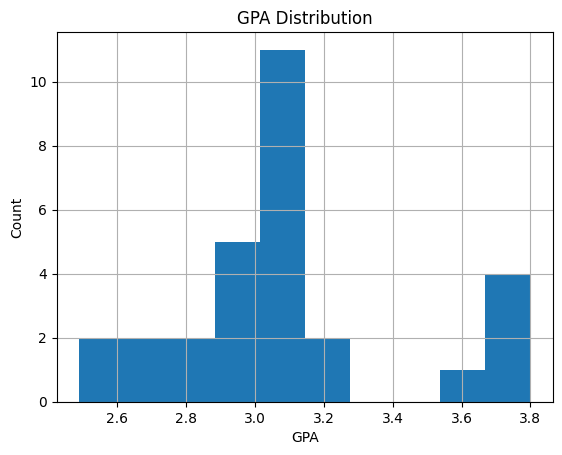

In [25]:
import matplotlib.pyplot as plt
plt.figure()
df["GPA"].plot(kind="hist", bins=10)
plt.title("GPA Distribution")
plt.xlabel("GPA")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## Export Cleaned Data

In [26]:
out_path = "./data/students_clean.csv"
df.to_csv(out_path, index=False)
print("Saved:", out_path)

Saved: ./data/students_clean.csv


## Summary
- Imported raw data and inspected structure and missingness.
- Cleaned missing values, fixed data types, standardized categories.
- Removed duplicates, flagged potential outliers via IQR.
- Engineered features and summarized with aggregation, groupby, and pivot tables.
- Exported a reproducible cleaned dataset.